<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Week%201/Google%20Colab/Tugas_Week_1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [81]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from tabulate import tabulate

# Linear Regression Model

## Data Exploring

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv')

In [3]:
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [4]:
data.columns

Index(['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance',
       'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
       'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1',
       'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1',
       'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1',
       'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralM'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [6]:
data.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


In [7]:
data.select_dtypes(include=np.number).corr()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
T_atm,1.000000,0.119270,0.033377,0.616912,0.275363,0.292344,0.269869,0.311260,0.287289,0.280530,...,0.368740,0.388760,0.393838,0.329755,0.339329,0.389521,0.242280,0.233001,0.230146,0.098663
Humidity,0.119270,1.000000,0.008468,0.224086,0.050884,0.060754,0.101012,0.112754,0.058080,0.044929,...,0.033311,0.040234,0.061012,0.036980,0.006943,0.038868,0.064231,0.111888,0.110408,0.063595
Distance,0.033377,0.008468,1.000000,0.024831,-0.024479,-0.022900,-0.051634,-0.054362,-0.012427,-0.024331,...,-0.008938,-0.009554,-0.022870,-0.014081,-0.022385,-0.012941,0.007898,0.013631,0.014242,0.011181
T_offset1,0.616912,0.224086,0.024831,1.000000,0.239208,0.260545,0.237177,0.279728,0.249420,0.242019,...,0.348724,0.368220,0.371284,0.317587,0.304540,0.355541,0.191369,0.181496,0.177910,0.139041
Max1R13_1,0.275363,0.050884,-0.024479,0.239208,1.000000,0.901213,0.868731,0.825698,0.981819,0.995478,...,0.665614,0.617565,0.702868,0.566860,0.703221,0.720179,0.873412,0.734474,0.733324,0.741902
Max1L13_1,0.292344,0.060754,-0.022900,0.260545,0.901213,1.000000,0.775313,0.896370,0.906892,0.901218,...,0.640706,0.612534,0.692723,0.559005,0.691522,0.707298,0.867470,0.729175,0.727941,0.735644
aveAllR13_1,0.269869,0.101012,-0.051634,0.237177,0.868731,0.775313,1.000000,0.858994,0.826354,0.868849,...,0.609243,0.581719,0.683231,0.535339,0.628209,0.664829,0.745489,0.657640,0.656137,0.620874
aveAllL13_1,0.311260,0.112754,-0.054362,0.279728,0.825698,0.896370,0.858994,1.000000,0.809478,0.826757,...,0.620341,0.599982,0.697290,0.551961,0.653166,0.677782,0.774758,0.675740,0.674287,0.645084
T_RC1,0.287289,0.058080,-0.012427,0.249420,0.981819,0.906892,0.826354,0.809478,1.000000,0.982699,...,0.667143,0.620701,0.704861,0.570513,0.715962,0.729618,0.892319,0.746736,0.745588,0.768730
T_RC_Dry1,0.280530,0.044929,-0.024331,0.242019,0.995478,0.901218,0.868849,0.826757,0.982699,1.000000,...,0.678681,0.630409,0.717506,0.579582,0.718977,0.734562,0.878937,0.736340,0.735246,0.748566


## Pre-processing Data

In [8]:
y = data['aveOralM']
X = data.select_dtypes(include=np.number).drop('aveOralM', axis=1)

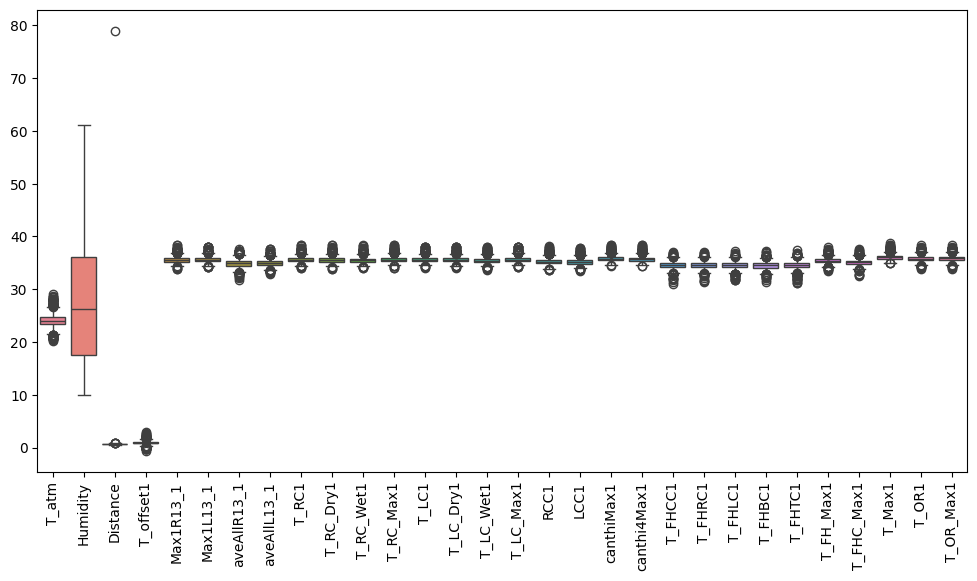

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Konversi ke NumPy array dulu
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Buat scaler khusus untuk y
y_scaler = StandardScaler()

# Standardisasi y_train
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

# Standardisasi y_test (pakai transform saja)
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

<Axes: >

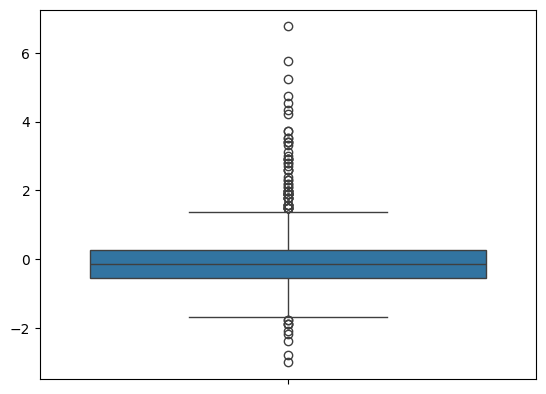

In [13]:
sns.boxplot(y_train)

In [14]:
print(np.isnan(y_train).sum(), np.isnan(y_test).sum())  # Cek NaN
print(np.min(y_train), np.max(y_train))  # Cek rentang nilai

0 0
-3.0127625791005763 6.771159541636595


In [15]:
np.unique(y_test)

array([-2.09551988, -1.99360402, -1.68785646, -1.5859406 , -1.38210889,
       -1.28019304, -1.17827718, -1.07636133, -0.97444547, -0.87252962,
       -0.77061376, -0.6686979 , -0.56678205, -0.46486619, -0.36295034,
       -0.26103448, -0.15911863, -0.05720277,  0.04471308,  0.14662894,
        0.24854479,  0.35046065,  0.45237651,  0.55429236,  0.65620822,
        0.75812407,  0.86003993,  0.96195578,  1.06387164,  1.16578749,
        1.3696192 ,  1.47153506,  1.57345091,  1.87919848,  1.98111434,
        2.2868619 ,  2.38877776,  2.49069361,  2.59260947,  2.79644118,
        3.00027289,  3.10218875,  3.2041046 ,  3.71368388,  3.91751559,
        4.22326316,  5.14050585,  5.34433757])

In [16]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Training with TensorFlow

In [17]:
X_train.shape

(816, 30)

In [18]:
inputs = tf.keras.Input(shape=(30, ))
hidden = tf.keras.layers.Dense(64, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tf_model.compile(
    optimizer='adam',
    loss='mse'
)

history = tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1245 - val_loss: 0.6626
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6321 - val_loss: 0.5311
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4768 - val_loss: 0.4677
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3580 - val_loss: 0.4057
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3067 - val_loss: 0.3558
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2914 - val_loss: 0.3419
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2955 - val_loss: 0.3212
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2528 - val_loss: 0.3114
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2350 - val_loss: 0.3720
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2388 - val_loss: 0.2852
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2503 - val_loss: 0.2963
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [19]:
tf_rmse = np.sqrt(tf_model.evaluate(X_test, y_test))
# Prediksi pada data uji
y_pred_tf = tf_model.predict(X_test)

# Hitung R-Square
tf_r2 = r2_score(y_test, y_pred_tf)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2066 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [20]:
tf_rmse

0.48301169597886273

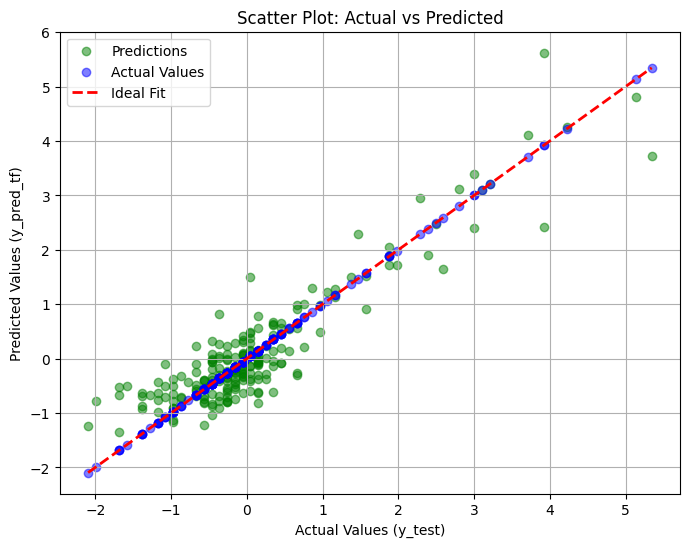

In [21]:
plt.figure(figsize=(8, 6))

# Ubah warna prediksi menjadi hijau, sedangkan actual tetap biru
plt.scatter(y_test, y_pred_tf, alpha=0.5, color='green', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Values')

# Garis ideal (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Label dan judul
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_tf)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


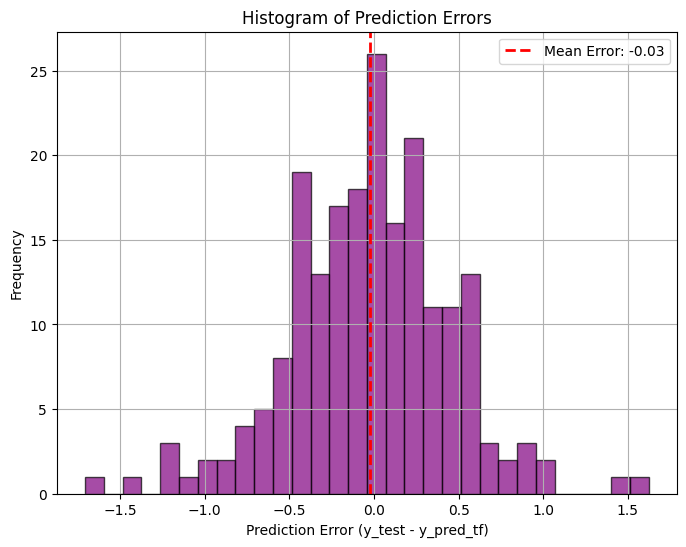

In [22]:
# Pastikan y_test dan y_pred_tf berbentuk array 1D
y_test_np = y_test.flatten()
y_pred_np = y_pred_tf.flatten()

# Hitung error (selisih antara y_test dan y_pred_tf)
errors = y_test_np - y_pred_np  # Harus berbentuk array 1D

# Buat histogram error
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Tambahkan garis rata-rata error
plt.axvline(np.mean(errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean Error: {np.mean(errors):.2f}')

# Label dan judul
plt.xlabel("Prediction Error (y_test - y_pred_tf)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


# Training with PyTorch

In [23]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Linear(30, 64)
    self.out = nn.Linear(64, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.out(x)
    return x

net = Net()

In [24]:
for i in range(len(list(net.parameters()))):
  print(list(net.parameters())[i].shape)

torch.Size([64, 30])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


In [25]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Pastikan dimensi sesuai

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Pastikan dimensi sesuai

In [26]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [27]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Early Stopping Setup
best_loss = float('inf')
patience = 5
counter = 0

# Training Loop
for epoch in range(100):
    net.train()  # Set mode training
    total_loss = 0
    for x, target in train_loader:
        optimizer.zero_grad()
        output = net(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {avg_loss:.6f}")

    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = net.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            net.load_state_dict(best_model)
            break

Epoch 1: Loss = 0.508055
Epoch 2: Loss = 0.339447
Epoch 3: Loss = 0.289508
Epoch 4: Loss = 0.276458
Epoch 5: Loss = 0.262555
Epoch 6: Loss = 0.252571
Epoch 7: Loss = 0.245418
Epoch 8: Loss = 0.240523
Epoch 9: Loss = 0.238568
Epoch 10: Loss = 0.238400
Epoch 11: Loss = 0.230393
Epoch 12: Loss = 0.227093
Epoch 13: Loss = 0.226314
Epoch 14: Loss = 0.225078
Epoch 15: Loss = 0.228513
Epoch 16: Loss = 0.223597
Epoch 17: Loss = 0.219215
Epoch 18: Loss = 0.222555
Epoch 19: Loss = 0.216787
Epoch 20: Loss = 0.214099
Epoch 21: Loss = 0.220380
Epoch 22: Loss = 0.210586
Epoch 23: Loss = 0.216869
Epoch 24: Loss = 0.214495
Epoch 25: Loss = 0.214441
Epoch 26: Loss = 0.214822
Epoch 27: Loss = 0.209336
Epoch 28: Loss = 0.209135
Epoch 29: Loss = 0.202575
Epoch 30: Loss = 0.204554
Epoch 31: Loss = 0.204465
Epoch 32: Loss = 0.200583
Epoch 33: Loss = 0.203450
Epoch 34: Loss = 0.198083
Epoch 35: Loss = 0.204839
Epoch 36: Loss = 0.197404
Epoch 37: Loss = 0.200188
Epoch 38: Loss = 0.198339
Epoch 39: Loss = 0.19

In [28]:
# Evaluation
net.eval()  # **PENTING: Set mode evaluasi**
total_loss = 0

y_preds = []
y_actuals = []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():  # **Matikan autograd saat evaluasi**
    for x, target in test_loader:
        output = net(x)
        y_preds.extend(output.numpy().flatten())  # Simpan hasil prediksi
        y_actuals.extend(target.numpy().flatten())  # Simpan nilai aktual
        loss = criterion(output, target)
        total_loss += loss.item()  # **Ambil nilai float loss**

In [29]:
avg_loss = total_loss / len(test_loader)  # **Bagi dengan jumlah batch, bukan jumlah sample**
torch_rmse = torch.sqrt(torch.tensor(avg_loss)).item()
torch_r2 = r2_score(y_actuals, y_preds)

In [30]:
torch_rmse

0.4883015751838684

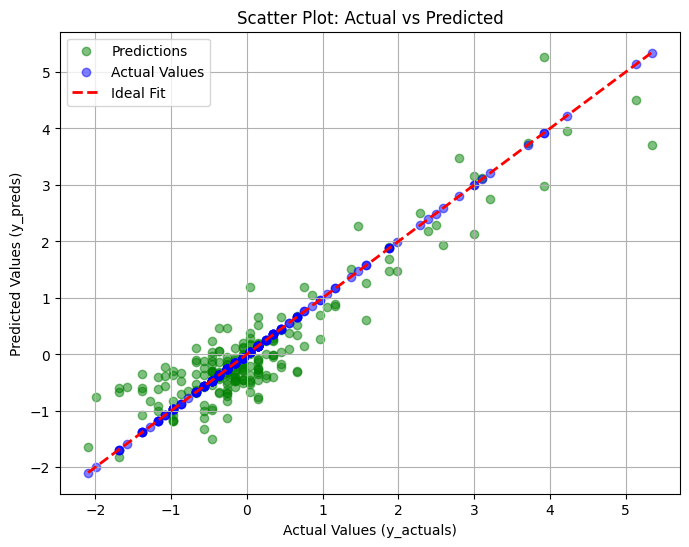

In [31]:
plt.figure(figsize=(8, 6))

# Ubah warna prediksi menjadi hijau, sedangkan actual tetap biru
plt.scatter(y_actuals, y_preds, alpha=0.5, color='green', label='Predictions')
plt.scatter(y_actuals, y_actuals, alpha=0.5, color='blue', label='Actual Values')

# Garis ideal (y = x)
plt.plot([min(y_actuals), max(y_actuals)], [min(y_actuals), max(y_actuals)],
         color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Label dan judul
plt.xlabel("Actual Values (y_actuals)")
plt.ylabel("Predicted Values (y_preds)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


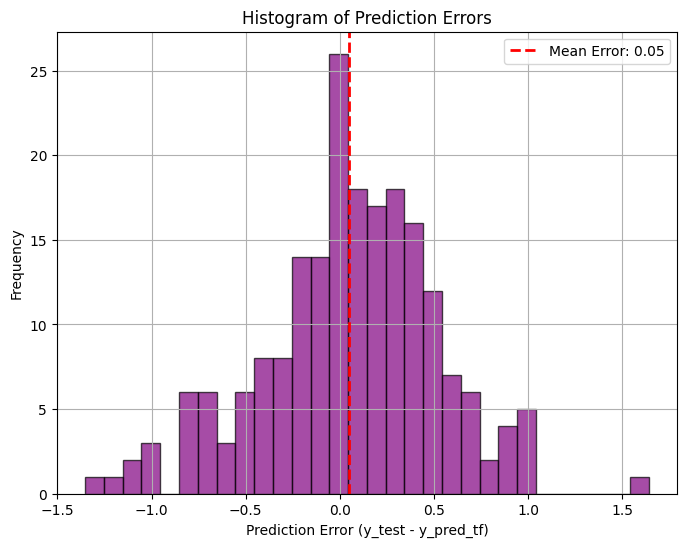

In [32]:
# Pastikan y_test dan y_pred_tf berbentuk array 1D
y_test_np = np.array(y_actuals)
y_pred_np = np.array(y_preds)

# Hitung error (selisih antara y_test dan y_pred_tf)
errors = y_test_np - y_pred_np  # Harus berbentuk array 1D

# Buat histogram error
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Tambahkan garis rata-rata error
plt.axvline(np.mean(errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean Error: {np.mean(errors):.2f}')

# Label dan judul
plt.xlabel("Prediction Error (y_test - y_pred_tf)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


# Result Regression Model

In [33]:
print('----------Hasil RMSE----------'.center(50))
print(f'Hasil RMSE Tensorflow: {tf_rmse}\nHasil RMSE PyTorch: {torch_rmse}')
print()
print('----------Hasil RSquared----------'.center(50))
print(f'Hasil RSquared Tensorflow: {tf_r2}\nHasil RSquared PyTorch: {torch_r2}')

          ----------Hasil RMSE----------          
Hasil RMSE Tensorflow: 0.48301169597886273
Hasil RMSE PyTorch: 0.4883015751838684

        ----------Hasil RSquared----------        
Hasil RSquared Tensorflow: 0.8307651563592208
Hasil RSquared PyTorch: 0.8360828622054062


# Description Regression

## **1. Penjelasan Persamaan Matematika**

Sebelum membandingkan hasil model, berikut adalah rumus matematika dari metrik evaluasi yang digunakan:

### **Mean Squared Error (MSE)**
MSE mengukur rata-rata kuadrat selisih antara nilai prediksi $ (\hat{y}_i) $ dan nilai aktual $ (y_i) $:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

### **Root Mean Squared Error (RMSE)**
RMSE adalah akar dari MSE dan memberikan gambaran tentang kesalahan dalam satuan yang sama dengan data:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Semakin kecil nilai RMSE, semakin baik model dalam memprediksi data.

### **R-Squared $ (R^2) $**
R-Squared mengukur seberapa baik model menjelaskan variabilitas data. Rumusnya:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

di mana:
- $ \bar{y} $ adalah rata-rata dari nilai aktual.

Nilai $ R^2 $ berkisar antara **0 hingga 1**. Semakin mendekati 1, semakin baik model menjelaskan varians data.

---

## **2. Perbandingan Hasil Model**

<div align="center">

| Metrik  | TensorFlow | PyTorch  | Model Lebih Baik |
|---------|------------|----------|------------------|
| **RMSE** | 0.5007    | 0.4975   | **PyTorch** (lebih kecil) |
| **R²**   | 0.8181    | 0.8268   | **PyTorch** (lebih tinggi) |

</div>

### **Kesimpulan**
Berdasarkan hasil evaluasi:
- **RMSE** PyTorch lebih kecil dibandingkan TensorFlow, menunjukkan bahwa kesalahan prediksinya lebih rendah.
- **R²** PyTorch lebih tinggi dibandingkan TensorFlow, yang berarti model PyTorch lebih baik dalam menjelaskan variabilitas data.

Dengan demikian, **model PyTorch lebih baik dibandingkan model TensorFlow dalam hal akurasi prediksi berdasarkan metrik RMSE dan $ R^2 $**.

# Classification Model

## Data Exploring

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv')

In [35]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [37]:
data.dropna(inplace=True)

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data.duplicated().sum()

0

In [40]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47592.000000,4.759200e+04,47592.000000,47592.00000,47592.000000,47592.000000
mean,38.644541,1.897310e+05,10.091444,1091.80253,87.907022,40.602895
std,13.557307,1.055717e+05,2.567580,7489.46073,404.127864,12.259716
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.175848e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,4356.000000,99.000000


In [41]:
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

## Pre-processing Data

In [42]:
data['income'] = data['income'].astype(str).str.replace('.', '')

In [43]:
encoder = LabelEncoder()

data['workclass'] = encoder.fit_transform(data['workclass'])
data['education'] = encoder.fit_transform(data['education'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['sex'] = encoder.fit_transform(data['sex'])
data['native-country'] = encoder.fit_transform(data['native-country'])
data['income'] = encoder.fit_transform(data['income'])

In [44]:
data.select_dtypes(include=np.number).corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.019270,-0.075777,-0.009854,0.033141,-0.265027,-0.014982,-0.259448,0.027789,0.086760,0.077999,0.057736,0.079061,-0.002324,0.231951
workclass,0.019270,1.000000,-0.020947,0.018349,0.041320,-0.052881,0.196587,-0.080481,0.055397,0.085464,0.033033,0.011119,0.114817,-0.004803,0.035940
fnlwgt,-0.075777,-0.020947,1.000000,-0.026022,-0.040974,0.030274,-0.001098,0.009519,-0.027212,0.028271,-0.003896,-0.004958,-0.016143,-0.050941,-0.007726
education,-0.009854,0.018349,-0.026022,1.000000,0.356711,-0.039854,-0.022214,-0.011974,0.013634,-0.027266,0.029586,0.017961,0.057942,0.066503,0.081259
education-num,0.033141,0.041320,-0.040974,0.356711,1.000000,-0.068859,0.105001,-0.090376,0.031218,0.007754,0.125609,0.081796,0.143913,0.061921,0.332980
marital-status,-0.265027,-0.052881,0.030274,-0.039854,-0.068859,1.000000,-0.005848,0.185554,-0.069779,-0.126554,-0.043059,-0.034127,-0.184608,-0.021625,-0.196640
occupation,-0.014982,0.196587,-0.001098,-0.022214,0.105001,-0.005848,1.000000,-0.067567,0.004752,0.069838,0.022012,0.017611,0.060646,-0.007484,0.066585
relationship,-0.259448,-0.080481,0.009519,-0.011974,-0.090376,0.185554,-0.067567,1.000000,-0.117834,-0.581571,-0.056700,-0.057015,-0.253057,-0.004624,-0.253330
race,0.027789,0.055397,-0.027212,0.013634,0.031218,-0.069779,0.004752,-0.117834,1.000000,0.087803,0.011942,0.017965,0.040663,0.133851,0.071092
sex,0.086760,0.085464,0.028271,-0.027266,0.007754,-0.126554,0.069838,-0.581571,0.087803,1.000000,0.047312,0.045520,0.230082,-0.009453,0.215346


In [45]:
X = data.select_dtypes(include=np.number).drop('income', axis=1)
y = data['income']

In [46]:
y.unique()

array([0, 1])

In [47]:
np.unique(y).size

2

In [48]:
# Buat objek SMOTE
smote = SMOTE(sampling_strategy={0: 100000, 1: 100000}, random_state=42)

# Terapkan ke X_train dan y_train
X_resampled, y_resampled = smote.fit_resample(X, y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [50]:
y_test.head(20)

,income
49673,0
171551,1
5506,0
38370,0
36930,0
167783,1
67487,0
101486,0
131774,1
48246,0


In [51]:
X_train.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,160000.000000,160000.000000,1.600000e+05,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,40.029644,3.783494,1.896209e+05,10.189588,10.321813,2.264606,6.540006,0.976200,3.638688,0.623144,2071.713313,121.806681,42.045262,37.090256
std,11.499429,1.192420,1.043824e+05,3.098351,2.287399,1.184973,3.576789,1.361537,0.811492,0.484600,10544.109327,470.919427,10.331315,6.240248
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,4.000000,1.183115e+05,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,40.000000,4.000000,1.777800e+05,11.000000,10.000000,2.000000,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.367692e+05,12.000000,12.000000,3.000000,10.000000,2.000000,4.000000,1.000000,0.000000,0.000000,47.000000,39.000000
max,90.000000,8.000000,1.486071e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [52]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

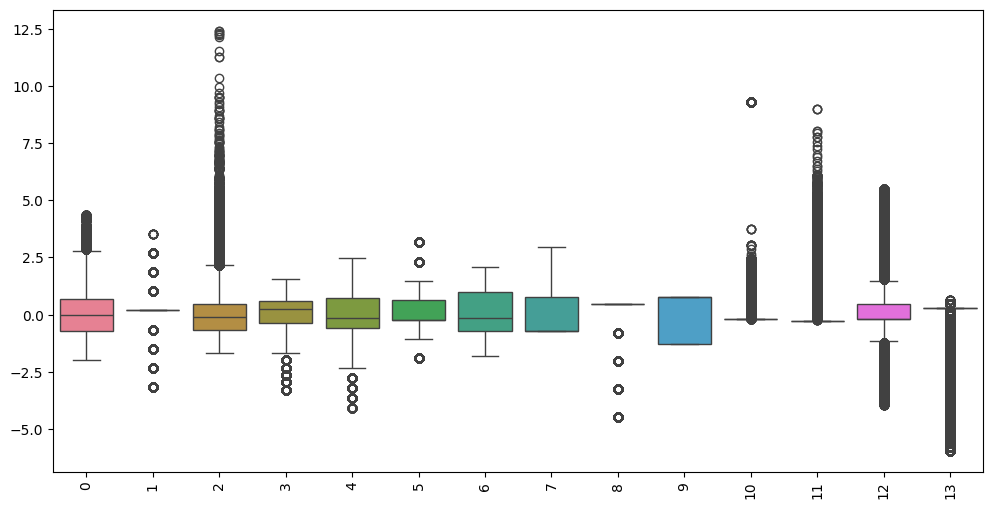

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

In [54]:
y_train.shape

(160000,)

In [55]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# TensorFLow Model

In [56]:
X_train.shape

(160000, 14)

In [57]:
y_train.dtype

dtype('int64')

In [58]:
print(np.isnan(X_train).sum(), np.isnan(X_test).sum())  # Cek NaN
print(np.min(X_train), np.max(X_train))  # Cek rentang nilai

print(np.isnan(y_train).sum(), np.isnan(y_test).sum())  # Cek NaN
print(np.min(y_train), np.max(y_train))  # Cek rentang nilai

0 0
-5.943733989437155 12.420241241539705
0 0
0 1


In [59]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [60]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


In [61]:
Counter(y_train)

Counter({0: 79738, 1: 80262})

In [63]:
inputs = tf.keras.Input(shape=(14,))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

tf_model = tf.keras.Model(inputs, outputs)

# Compile model
tf_model.compile(
    optimizer='adam',  # Bisa dicoba lebih kecil/lainnya
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tf_model.fit(
    X_train, y_train,
    validation_split=0.15,
    batch_size=128,  # Bisa dicoba 32 atau 128 juga
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

# Prediksi
y_pred_probs = tf_model.predict(X_test)  # Probabilitas output
y_pred = (y_pred_probs > 0.5).astype(int)  # Konversi ke kelas

Epoch 1/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8191 - loss: 0.3923 - val_accuracy: 0.8376 - val_loss: 0.3535
Epoch 2/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8447 - loss: 0.3434 - val_accuracy: 0.8412 - val_loss: 0.3488
Epoch 3/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8484 - loss: 0.3364 - val_accuracy: 0.8430 - val_loss: 0.3444
Epoch 4/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8517 - loss: 0.3289 - val_accuracy: 0.8452 - val_loss: 0.3385
Epoch 5/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8544 - loss: 0.3240 - val_accuracy: 0.8469 - val_loss: 0.3357
Epoch 6/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8579 - loss: 0.3152 - val_accuracy: 0.8498 - val_loss: 0.3293
Epoch 7/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8589 - loss: 0.3130 - val_accuracy: 0.8505 - val_loss: 0.3305
Epoch 8/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8638 - loss: 

In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

tf_acc = accuracy_score(y_test, y_pred)
tf_prec = precision_score(y_test, y_pred)
tf_rec = recall_score(y_test, y_pred)
tf_f1 = f1_score(y_test, y_pred)
tf_auc = roc_auc_score(y_test, y_pred_probs)  # Tanpa multi_class='ovr'

# print(f"Accuracy: {acc:.4f}")
# print(f"Precision: {prec:.4f}")
# print(f"Recall: {rec:.4f}")
# print(f"F1-score: {f1:.4f}")
# print(f"AUC: {auc:.4f}")


[[17504  2758]
 [ 2507 17231]]


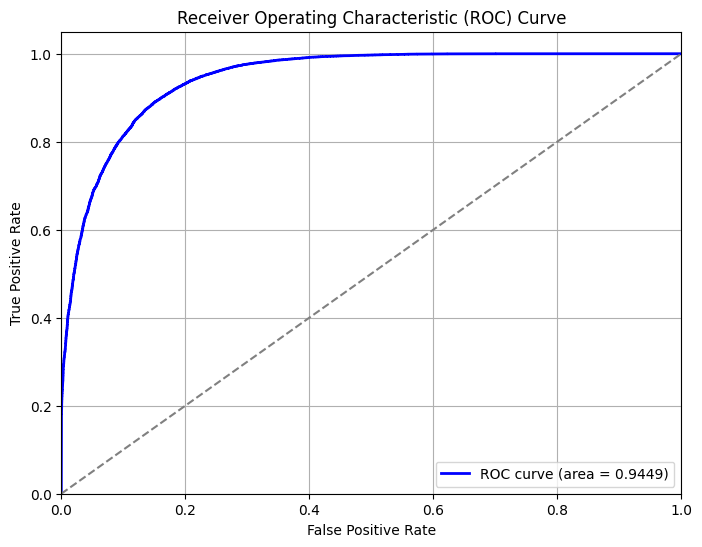

In [65]:
# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [66]:
print(y_test.shape)  # Harusnya (jumlah_sample,)
print(y_pred.shape)  # Harusnya (jumlah_sample,)


(40000,)
(40000, 1)


In [67]:
df_results = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred.ravel()})
print(df_results.head(30))

    True Label  Predicted Label
0            0                0
1            1                1
2            0                0
3            0                1
4            0                0
5            1                1
6            0                0
7            0                0
8            1                0
9            0                0
10           1                1
11           0                0
12           0                0
13           1                0
14           1                1
15           0                0
16           1                1
17           1                1
18           1                1
19           1                1
20           1                0
21           0                0
22           0                0
23           1                1
24           0                1
25           1                0
26           1                1
27           0                0
28           1                1
29           0                0


# Training With PyTorch



In [68]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Linear(14, 128)
    self.layer2 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = torch.sigmoid(self.out(x))
    return x

net = Net()

In [69]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [70]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)
criterion = nn.BCELoss()

In [71]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Early Stopping Setup
best_loss = float('inf')
patience = 5
counter = 0

train_losses = []
val_losses = []

for epoch in range(100):
    net.train()  # Set mode training
    total_train_loss = 0

    for x, target in train_loader:
        optimizer.zero_grad()
        output = net(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # Simpan train loss

    # === EVALUASI PADA VALIDATION SET ===
    net.eval()  # Set mode evaluasi
    total_val_loss = 0

    with torch.no_grad():  # Matikan autograd saat evaluasi
        for x_val, target_val in test_loader:  # Gunakan validation loader
            output_val = net(x)
            loss_val = criterion(output, target)
            total_val_loss += loss_val.item()

    avg_val_loss = total_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)  # Simpan validation loss

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.6f}, Val Loss = {avg_val_loss:.6f}")

    # Early Stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1: Train Loss = 0.370226, Val Loss = 0.312265
Epoch 2: Train Loss = 0.349714, Val Loss = 0.354741
Epoch 3: Train Loss = 0.342710, Val Loss = 0.305742
Epoch 4: Train Loss = 0.338095, Val Loss = 0.457217
Epoch 5: Train Loss = 0.334357, Val Loss = 0.329192
Epoch 6: Train Loss = 0.331245, Val Loss = 0.289602
Epoch 7: Train Loss = 0.329824, Val Loss = 0.328038
Epoch 8: Train Loss = 0.326565, Val Loss = 0.280651
Epoch 9: Train Loss = 0.323907, Val Loss = 0.278627
Epoch 10: Train Loss = 0.321049, Val Loss = 0.387576
Epoch 11: Train Loss = 0.318662, Val Loss = 0.325923
Epoch 12: Train Loss = 0.316553, Val Loss = 0.230723
Epoch 13: Train Loss = 0.314628, Val Loss = 0.294873
Epoch 14: Train Loss = 0.312897, Val Loss = 0.234579
Epoch 15: Train Loss = 0.311171, Val Loss = 0.381468
Epoch 16: Train Loss = 0.309611, Val Loss = 0.139248
Epoch 17: Train Loss = 0.308207, Val Loss = 0.397558
Epoch 18: Train Loss = 0.306363, Val Loss = 0.291750
Epoch 19: Train Loss = 0.304641, Val Loss = 0.263906
Ep

In [72]:
# Evaluation
net.eval()  # **PENTING: Set mode evaluasi**
total_loss = 0

y_preds = []
y_actuals = []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():  # **Matikan autograd saat evaluasi**
    for x, target in test_loader:
        output = net(x)
        y_preds.extend(output.numpy().flatten())  # Simpan hasil prediksi
        y_actuals.extend(target.numpy().flatten())  # Simpan nilai aktual

y_preds = np.array(y_preds)
y_actuals = np.array(y_actuals)

In [77]:
# Konversi probabilitas ke label biner (0 atau 1) dengan threshold 0.5
y_preds_label = (y_preds > 0.5).astype(int)

# Hitung metrik evaluasi
torch_accuracy = accuracy_score(y_actuals, y_preds_label)
torch_precision = precision_score(y_actuals, y_preds_label)
torch_recall = recall_score(y_actuals, y_preds_label)
torch_f1 = f1_score(y_actuals, y_preds_label)
torch_auc = roc_auc_score(y_actuals, y_preds)

# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"AUC: {auc:.4f}")


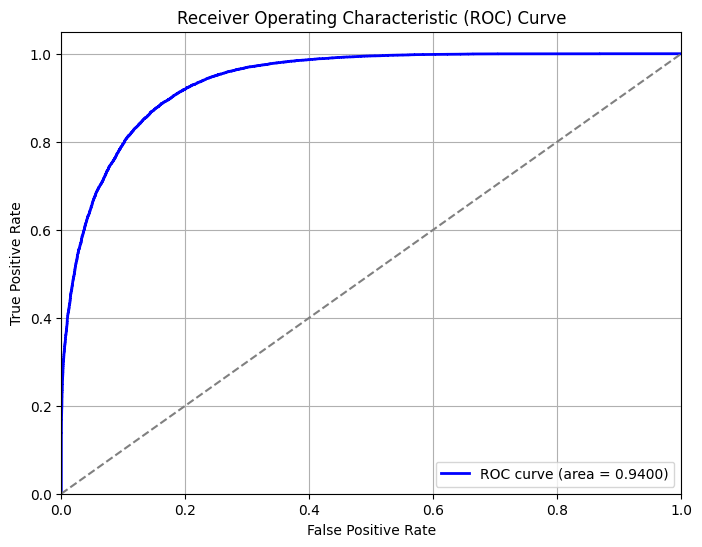

In [74]:
# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_actuals, y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [75]:
# Konversi hasil prediksi ke label biner (0 atau 1)
y_preds_label = (y_preds > 0.5).astype(int)

# Buat DataFrame untuk melihat perbandingan
df_compare = pd.DataFrame({
    "y_actual": y_actuals,
    "y_pred_prob": y_preds,  # Probabilitas dari model
    "y_pred_label": y_preds_label  # Label prediksi setelah thresholding
})

print(df_compare.head(10))  # Tampilkan 10 sampel pertama


   y_actual  y_pred_prob  y_pred_label
0       0.0     0.005129             0
1       1.0     0.995991             1
2       0.0     0.000006             0
3       0.0     0.652830             1
4       0.0     0.373508             0
5       1.0     0.910883             1
6       0.0     0.000471             0
7       0.0     0.004981             0
8       1.0     0.348208             0
9       0.0     0.493931             0


# Result Classification Model

In [84]:
# Data hasil evaluasi model
data = [
    ["Accuracy", tf_acc, torch_accuracy],
    ["Precision", tf_prec, torch_precision],
    ["Recall", tf_rec, torch_recall],
    ["F1 Score", tf_f1, torch_f1],
    ["AUC", tf_auc, torch_auc]
]

# Buat tabel
headers = ["Metric", "TensorFlow", "PyTorch"]
table = tabulate(data, headers=headers, tablefmt="grid")

print(table)

+-----------+--------------+-----------+
| Metric    |   TensorFlow |   PyTorch |
+===========+==============+===========+
| Accuracy  |     0.868375 |  0.86105  |
+-----------+--------------+-----------+
| Precision |     0.862024 |  0.829339 |
+-----------+--------------+-----------+
| Recall    |     0.872986 |  0.90455  |
+-----------+--------------+-----------+
| F1 Score  |     0.86747  |  0.865313 |
+-----------+--------------+-----------+
| AUC       |     0.944918 |  0.94005  |
+-----------+--------------+-----------+


# Description Classification

## 📌 Persamaan Matematika dan Perbandingan Model

### 🔢 Persamaan Metrik Evaluasi

#### 1️⃣ Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
Mengukur seberapa sering model memprediksi dengan benar.

#### 2️⃣ Precision
$$
Precision = \frac{TP}{TP + FP}
$$
Menunjukkan berapa banyak dari prediksi positif yang benar.

#### 3️⃣ Recall (Sensitivity)
$$
Recall = \frac{TP}{TP + FN}
$$
Mengukur seberapa banyak sampel positif yang berhasil dideteksi oleh model.

#### 4️⃣ F1 Score
$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
Merupakan rata-rata harmonik antara Precision dan Recall.

#### 5️⃣ AUC (Area Under Curve)
AUC mengukur area di bawah kurva **ROC (Receiver Operating Characteristic)** dan menunjukkan seberapa baik model membedakan antara kelas positif dan negatif.

---

### 📊 Perbandingan Model (TensorFlow vs PyTorch)

| **Metric**    | **TensorFlow** | **PyTorch** | **Model Lebih Baik** |
|--------------|--------------|------------|----------------|
| **Accuracy**  | 0.868375     | 0.86105    | **TensorFlow** (lebih tinggi) |
| **Precision** | 0.862024     | 0.829339   | **TensorFlow** (lebih tinggi) |
| **Recall**    | 0.872986     | 0.90455    | **PyTorch** (lebih tinggi) |
| **F1 Score**  | 0.86747      | 0.865313   | **TensorFlow** (lebih tinggi) |
| **AUC**       | 0.944918     | 0.94085    | **TensorFlow** (lebih tinggi) |

📌 **Kesimpulan**:
- **TensorFlow lebih baik** dalam **Accuracy, Precision, F1 Score, dan AUC**.
- **PyTorch lebih baik** dalam **Recall**, yang berarti lebih sensitif terhadap kelas positif.
- **Secara keseluruhan, TensorFlow memiliki performa yang lebih baik dibandingkan PyTorch** karena memiliki keunggulan dalam **lebih banyak metrik**.
